In [ ]:
# ! pip install -r requirements.txt

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../data/loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [8]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
df.info()
# there is no null value in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [11]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


All numerical columns has almost same median and mean, its mean there is a nomal distribution

In [13]:
df.Default.value_counts(normalize=True)

Default
0    0.883872
1    0.116128
Name: proportion, dtype: float64

output column is imbalance,  yes = .883, Default No = o.116

In [ ]:
df.duplicated().sum() # Ther is no duplicat value in dataset

np.int64(0)

In [17]:
category_df = df[[ 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']]
category_df

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...
255342,Bachelor's,Full-time,Married,No,No,Other,No
255343,High School,Part-time,Divorced,No,No,Home,No
255344,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,High School,Part-time,Single,Yes,Yes,Other,No


In [21]:
numerical_col = df.select_dtypes(include="number").columns
numerical_col

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

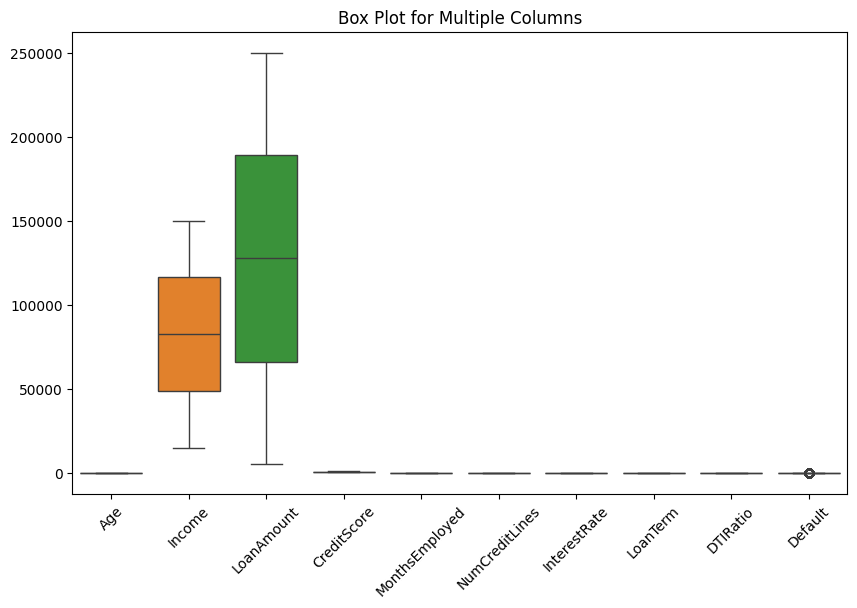

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_col])
plt.title("Box Plot for Multiple Columns")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
# There is problem in columns, we check it by value_counts

In [29]:
for col in numerical_col:
    print(col, " : ",df[col].kurt())

Age  :  -1.1984306327090095
Income  :  -1.198360926931816
LoanAmount  :  -1.2036798812613259
CreditScore  :  -1.200301814502096
MonthsEmployed  :  -1.1996324941634309
NumCreditLines  :  -1.3576713962415219
InterestRate  :  -1.1971672237742688
LoanTerm  :  -1.2998954478104605
DTIRatio  :  -1.199674818304813
Default  :  3.7426518315773514


<Axes: xlabel='Age', ylabel='Density'>

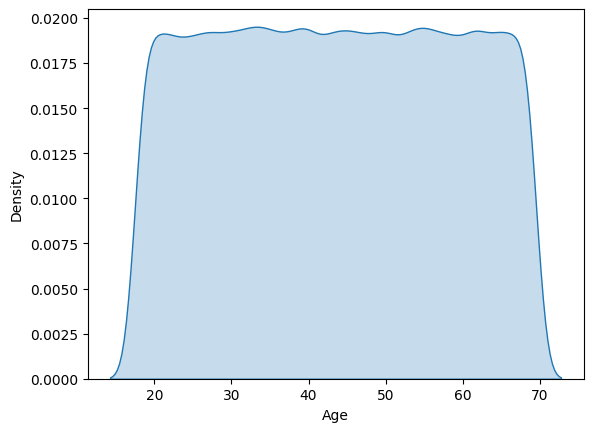

In [34]:
plt.Figure(figsize=(10,8))
sns.kdeplot(df.Age, fill=True)
# sns.kdeplot(df.LoanAmount, fill=True)

(array([25613., 25411., 25466., 25532., 25727., 25480., 25466., 25646.,
        25439., 25567.]),
 array([ 15000. ,  28499.9,  41999.8,  55499.7,  68999.6,  82499.5,
         95999.4, 109499.3, 122999.2, 136499.1, 149999. ]),
 <BarContainer object of 10 artists>)

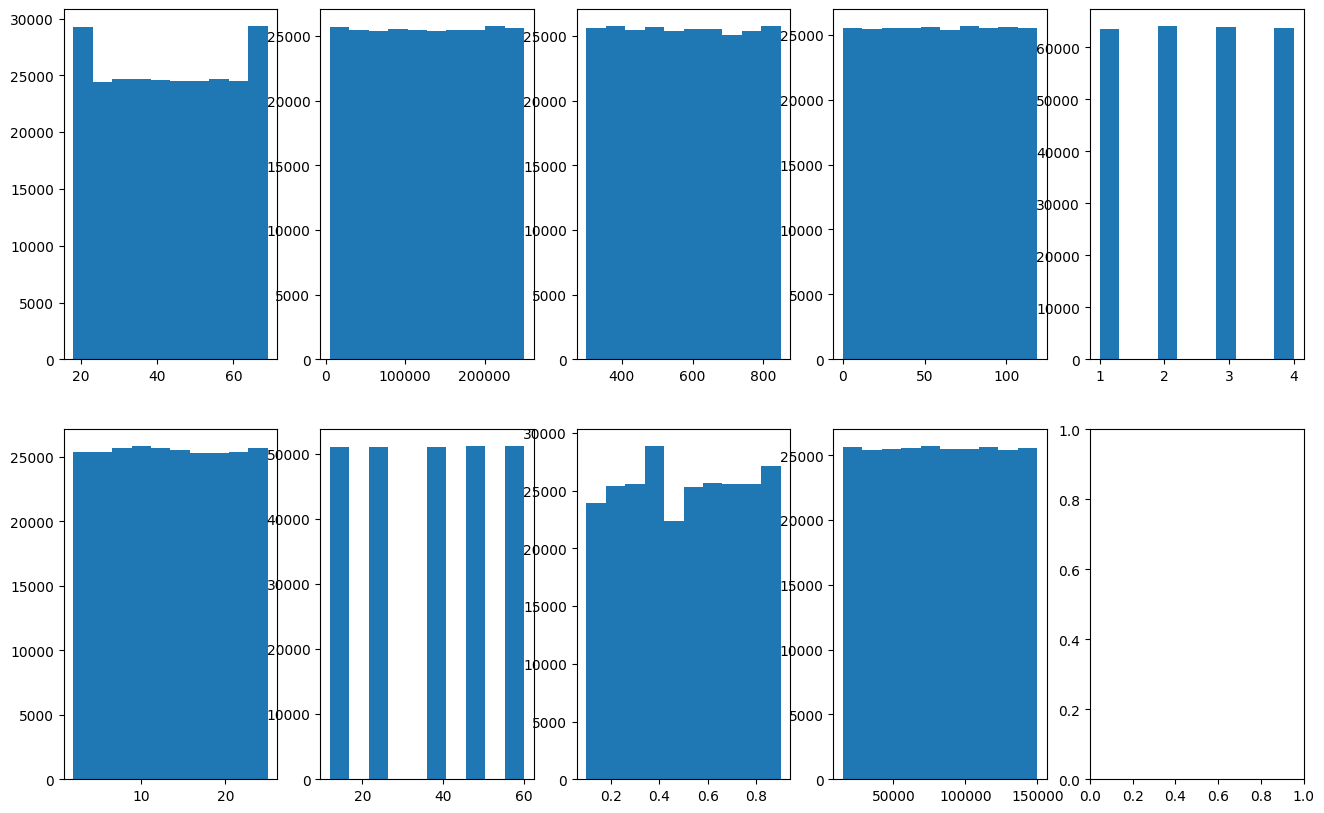

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16,10))
ax[0,0].hist(df.Age)
ax[0,1].hist(df.LoanAmount)
ax[0,2].hist(df.CreditScore)
ax[0,3].hist(df.MonthsEmployed)
ax[0,4].hist(df.NumCreditLines)
ax[1,0].hist(df.InterestRate)
ax[1,1].hist(df.LoanTerm)
ax[1,2].hist(df.DTIRatio)
ax[1,3].hist(df.Income)


In [47]:
df.NumCreditLines.value_counts()

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

In [49]:
df.LoanTerm.value_counts()

LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64

In [52]:
category_df.columns

Index(['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

(array([127701.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 127646.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

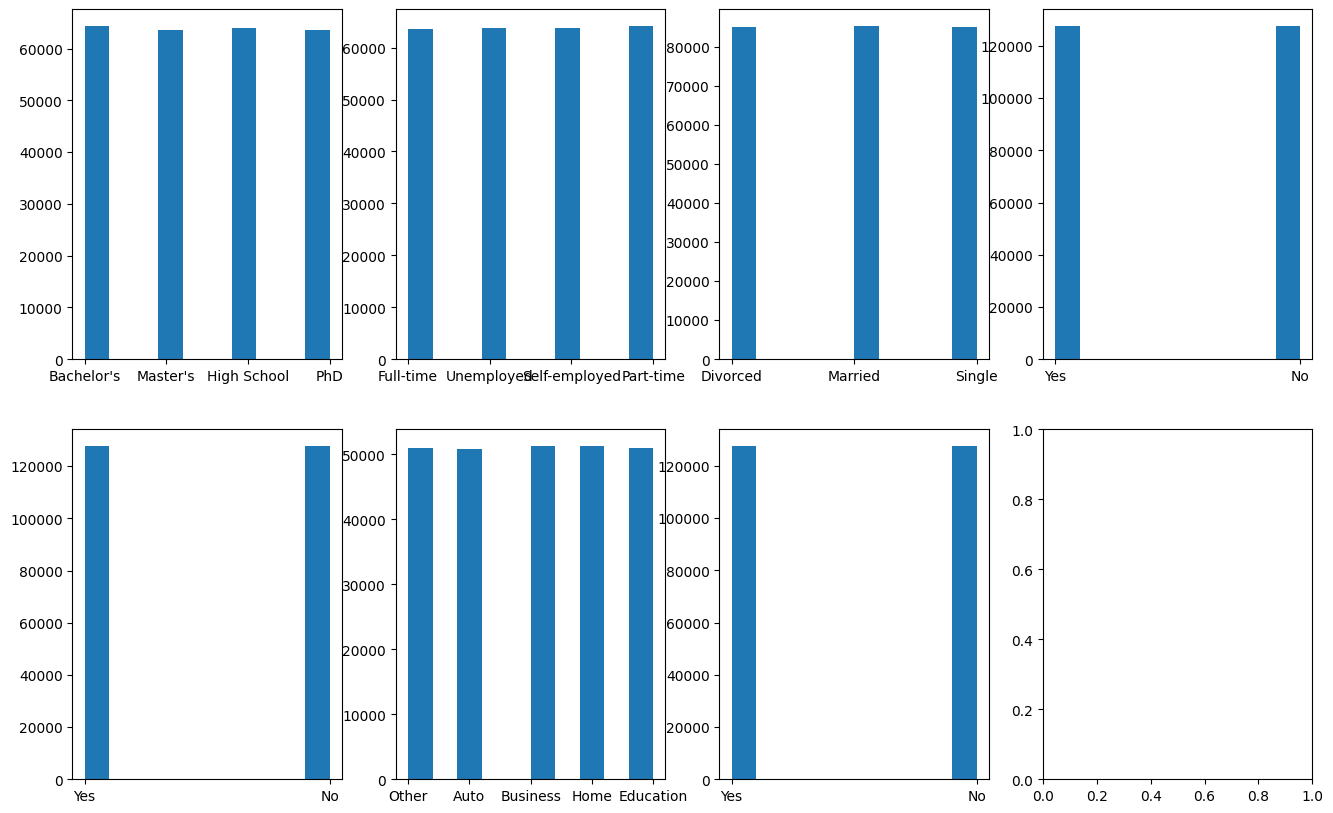

In [54]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
ax[0,0].hist(df.Education)
ax[0,1].hist(df.EmploymentType)
ax[0,2].hist(df.MaritalStatus)
ax[0,3].hist(df.HasMortgage)
ax[1,0].hist(df.HasDependents)
ax[1,1].hist(df.LoanPurpose)
ax[1,2].hist(df.HasCoSigner)


In [ ]:
# Label Encoding for binary classes
binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
df[binary_cols] = df[binary_cols].apply(lambda col: col.map({'Yes': 1, 'No': 0}))

In [56]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0,0


In [57]:
df.Education.value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64